In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
fashion = tf.keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion.load_data()

In [28]:
x_valid,x_train = x_train_full[:5000]/255,x_train_full[5000:]/255
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

<AxesSubplot:>

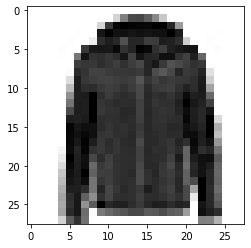

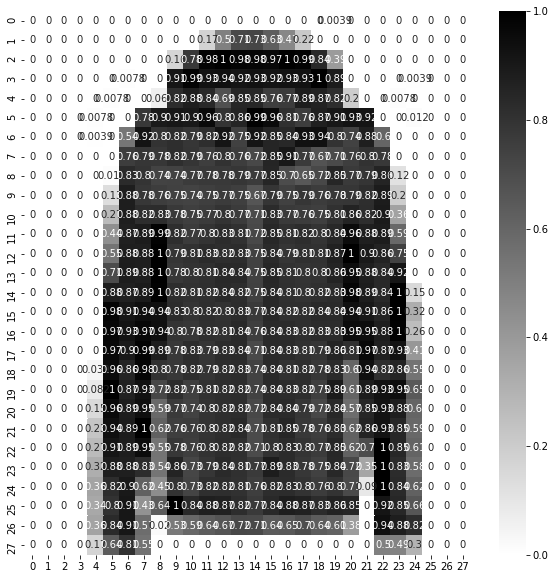

In [44]:
plt.imshow(x_train[0],cmap='binary')
plt.figure(figsize=(10,10))
sns.heatmap(x_train[0],cmap = 'binary',annot = True)

In [56]:
LAYERS = [tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(300,activation = 'relu'),
         tf.keras.layers.Dense(200,activation = 'relu'),
         tf.keras.layers.Dense(100,activation = 'relu'),
         tf.keras.layers.Dense(10,activation = 'softmax')]
model_clf = tf.keras.models.Sequential(LAYERS)


In [57]:
model_clf.layers


In [58]:
model_clf.compile( optimizer = 'SGD', loss = "sparse_categorical_crossentropy" , metrics = ['accuracy'] )
model_clf.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________


In [59]:
valid = (x_valid,y_valid)

history = model_clf.fit(x_train,y_train,epochs=30,validation_data=valid)

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7463 - accuracy: 0.7511 - val_loss: 0.5525 - val_accuracy: 0.8046
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4819 - accuracy: 0.8286 - val_loss: 0.4463 - val_accuracy: 0.8408: 1s - loss: 0.4955 - ac - ETA: 0s
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4315 - accuracy: 0.8451 - val_loss: 0.4088 - val_accuracy: 0.8568
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4023 - accuracy: 0.8560 - val_loss: 0.4078 - val_accuracy: 0.8538
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3783 - accuracy: 0.8649 - val_loss: 0.3682 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3607 - accuracy: 0.8698 - val_loss: 0.3618 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3459 - accuracy: 0.8758 

In [60]:
model_clf.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 66.0897 - accuracy: 0.8458A: 0s - loss: 67.8208 - accuracy: 0


[66.08967590332031, 0.84579998254776]

In [61]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.746292,0.751055,0.552457,0.8046
1,0.481884,0.828582,0.446339,0.8408
2,0.431494,0.845145,0.408776,0.8568
3,0.402326,0.856000,0.407794,0.8538
4,0.378273,0.864855,0.368177,0.8666
5,0.360686,0.869782,0.361847,0.8692
6,0.345885,0.875818,0.354498,0.8710
7,0.334050,0.878800,0.335909,0.8792
8,0.323375,0.882455,0.349703,0.8750
9,0.313060,0.885727,0.339799,0.8772


<AxesSubplot:>

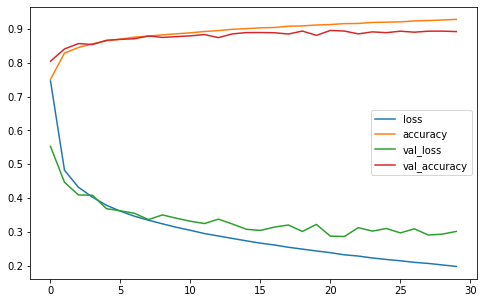

In [62]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [63]:
y_pred =  model_clf.predict(x_test)
y_pred[0].round()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [68]:
y_test[1]

2

In [67]:
y_pred[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)